<a href="https://colab.research.google.com/github/hiyoman/ai/blob/main/%EB%8F%84%EB%A1%9C%EC%82%B4%EC%96%BC%EC%9D%8C%20%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 가져오기
from google.colab import files  
uploaded = files.upload()           

Saving 도로살얼음 데이터정리2.csv to 도로살얼음 데이터정리2.csv


In [3]:
import io              # 입출력을 위한 라이브러리 가져오기   
import pandas as pd    # 자료 구조와 데이터 분석을 위한 라이브러리 가져오기
df = pd.read_csv(io.StringIO(uploaded['도로살얼음 데이터정리2.csv'].decode('cp949'))) # 변수에 데이터 읽어오기 

In [11]:
from sklearn.model_selection import train_test_split    # 훈련데이터 테스트데이터 나누기 위한 라이브러리 가져오기 
from sklearn.ensemble import RandomForestRegressor      # 랜덤포레스트 회귀분석 라이브러리 가져오기
import numpy as np                                      # 배열 생성을 위한 라이브러리 가져오기

In [5]:
# 입력 값 및 타겟 값으로 들어갈 변수 정리
x = df.drop(['마찰계수','YYMMDD','HHMMSS','1시간 뒤 마찰계수','5시간 뒤 마찰계수'], axis = 1)
target = df['5시간 뒤 마찰계수'].values

In [6]:
# 훈련데이터 테스트데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size = 0.3)

In [7]:
# 알고리즘 학습
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.values.reshape(-1,8), y_train.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [8]:
# 예측 값 저장
y_pred = regressor.predict(X_test.values.reshape(-1,8))
y_pred

array([0.81998386, 0.79855923, 0.8200001 , ..., 0.81996027, 0.81997512,
       0.81998446])

In [9]:
# 실제 값과 예측 값을 비교
df1 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df1

,Real Values,Predicted Values
0,0.820000,0.819984
1,0.798953,0.798559
2,0.820000,0.820000
3,0.775296,0.768338
4,0.820000,0.819992
...,...,...
58515,0.750418,0.750195
58516,0.820000,0.819038
58517,0.820000,0.819960
58518,0.820000,0.819975


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

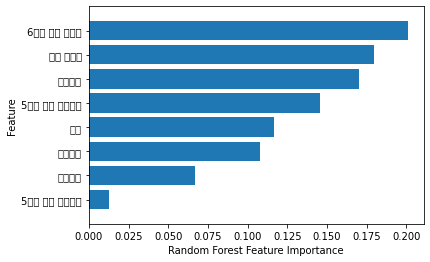

In [19]:
# 변수 중요도 확인
def plot_feature_importance(model):
  n_features = X_train.shape[1] 
  plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
  plt.yticks(np.arange(n_features), X_train.columns)
  plt.xlabel("Random Forest Feature Importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)
    
    
plot_feature_importance(regressor)

In [12]:
# 성능 평가
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_pred, y_test))
rmse = np.sqrt(mse)
print('rmse : ', rmse)
print("Mean Absolute Error(MAE) : ", mean_absolute_error(y_test,y_pred))
r2 =  r2_score(y_test, y_pred)
print("R Squared (R2) : ",r2)

rmse :  0.08407925779802965
Mean Absolute Error(MAE) :  0.0007705333253235565
R Squared (R2) :  0.9930022126292496


In [14]:
# 각 마찰계수 범위에 따라 관찰, 주의, 경계로 나눔
def get_surface_state(real):

    if real >= 0.8 :
        return "관찰"
    elif 0.6 <= real < 0.8 :
        return "주의"
    elif real < 0.6 :
        return "경계"

In [17]:
# 예측 값에 따른 예측단계 설정 후 데이터프레임에 추가
col_name = ['예측결과']
df2 = pd.DataFrame(y_pred, columns=col_name)
df2['예측단계'] = df2['예측결과'].apply(lambda x : get_surface_state(x))
df2

,예측결과,예측단계
0,0.819984,관찰
1,0.798559,주의
2,0.820000,관찰
3,0.768338,주의
4,0.819992,관찰
...,...,...
58515,0.750195,주의
58516,0.819038,관찰
58517,0.819960,관찰
58518,0.819975,관찰
